#### LOGISTIC REGRESSION : CLASSIFICATION ALGORITHM

- Supervised Learning
- Binary Classification ( two class - 0 or 1 )
- Example : collect data of different people and crop their faces and classify whether they are wearing mask or not
- We can extend logistic regression for multi class classification as well

In [10]:
# Import the required libraries

import numpy as np
import matplotlib.pyplot as plt

In [11]:
# DATA POINTS GENERATION : two sets of clusters with their mean and covariance - two features each in both clusters

mean_01 = np.array([1 , 0.5])
cov_01 = np.array([[1 , 0.1] , [0.1 , 1.2]])

mean_02 = np.array([4 , 5])
cov_02 = np.array([[1.2 , 0.1] , [0.1 , 1.3]])

np.random.seed(33)
dist_01 = np.random.multivariate_normal(mean_01 , cov_01 , 500)
dist_02 = np.random.multivariate_normal(mean_02 , cov_02 , 500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


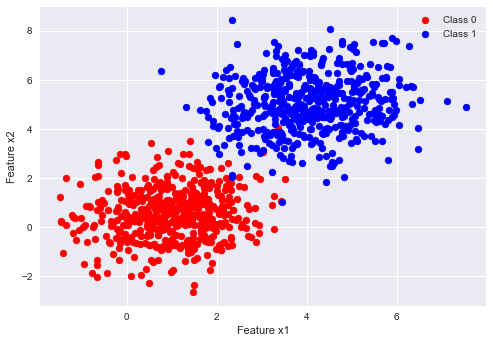

In [12]:
# VISUALISATION

plt.style.use('seaborn')
plt.scatter(dist_01[:,0] , dist_01[:,1] , color = 'red')
plt.scatter(dist_02[:,0] , dist_02[:,1] , color = 'blue')

plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend(labels = ['Class 0' , 'Class 1'])
plt.show()

In [13]:
# COMBINING WHOLE DATA

data = np.zeros((1000 , 3))

data[:500 , :2] = dist_01
data[500: , :2] = dist_02
data[500: , -1] = 1

# SHUFFLING OF DATA

np.random.shuffle(data)
print(data.shape)

(1000, 3)


In [14]:
print(data[:10])

[[ 2.46491437  3.646351    1.        ]
 [ 0.66081796  0.6117405   0.        ]
 [-0.63561267  1.02690308  0.        ]
 [-0.02337026  2.89062045  0.        ]
 [ 1.63590731 -0.4965041   0.        ]
 [ 1.44598745  0.28276288  0.        ]
 [ 0.15709833  0.24882667  0.        ]
 [ 4.07914218  6.96145352  1.        ]
 [-1.19670924 -0.26165693  0.        ]
 [ 3.40144261  5.87987725  1.        ]]


In [15]:
# DIVIDE DATA INTO TEST AND TRAIN PART

split = int(0.8*data.shape[0])    # 800

x_train = data[:split , :-1]
x_test = data[split: , :-1]

y_train = data[:split, -1]
y_test = data[split: , -1]

print(x_train.shape , x_test.shape ,  y_train.shape , y_test.shape)

(800, 2) (200, 2) (800,) (200,)


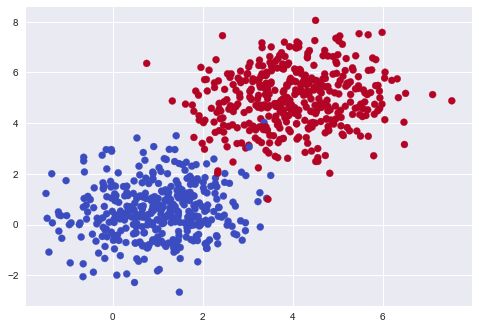

In [16]:
# PLOTTING THE POINTS 

plt.scatter(x_train[: , 0] , x_train[: , 1] , c = y_train , cmap = plt.cm.coolwarm)
plt.show()

In [17]:
# DATA NORMALISATION

x_mean = x_train.mean(axis = 0)
print(x_mean)
x_std = x_train.std(axis = 0)
print(x_std)

# apply the transformation
x_train = (x_train - x_mean)/x_std

# APPLYING SAME TRANSFORMATION TO TEST DATA SO THAT ITS RELATIVE DISTRIBUTION DOES NOT CHANGE
x_test = (x_test - x_mean)/x_std

print(x_train.mean(axis=0) , x_train.std(axis=0))

[2.535922   2.82210954]
[1.8230121  2.46403934]
[-5.00433028e-16  1.88363214e-15] [1. 1.]


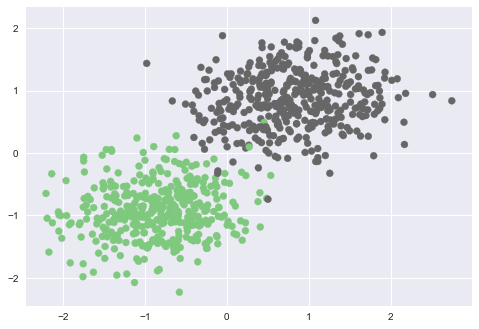

In [9]:
plt.scatter(x_train[: , 0] , x_train[: , 1] , c = y_train , cmap = plt.cm.Accent)
plt.show()

In [18]:
# decision-surface is a linear line or a hyper plane so logistic regression can do binary classifications

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
y_train = y_train.reshape((-1,))

In [20]:
# training the model

model.fit(x_train , y_train)

LogisticRegression()

In [21]:
# model parameters

theta_0 = model.intercept_
theta_1 = model.coef_

print(theta_0 , theta_1)

[0.44426618] [[2.93335533 4.27023309]]


In [22]:
# training accuracy

model.score(x_train , y_train)

0.99125

In [24]:
# making predictions

y_pred = model.predict(x_test)
print(y_pred.shape)

# testing accuracy

model.score(x_test , y_test)*100

(200,)


100.0

In [25]:
print(y_pred)

[0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1.]


In [35]:
model.predict_proba(x_test[:10])

array([[9.99292752e-01, 7.07247815e-04],
       [9.97727247e-01, 2.27275324e-03],
       [1.19008200e-04, 9.99880992e-01],
       [9.88024315e-01, 1.19756852e-02],
       [9.99354000e-01, 6.45999965e-04],
       [9.99951449e-01, 4.85511315e-05],
       [2.15075992e-04, 9.99784924e-01],
       [9.63127016e-01, 3.68729842e-02],
       [2.43203589e-04, 9.99756796e-01],
       [9.90921963e-01, 9.07803657e-03]])

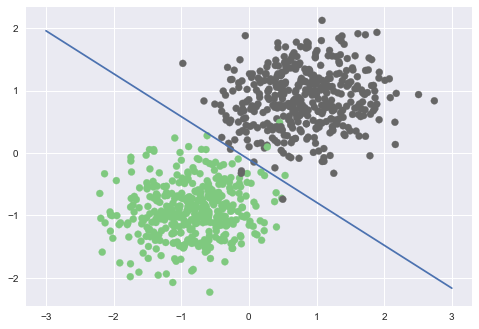

In [32]:
# equation of line - theta0 + theta1x1 + theta2x2 = 0 or (ax + by + c = 0)

x1 = np.arange(-3, 4)

x2 = -(theta_0 + theta_1[0][0]*x1)/theta_1[0][1]
plt.plot(x1 , x2)

plt.scatter(x_train[: , 0] , x_train[: , 1] , c = y_train.reshape((-1,)) , cmap = plt.cm.Accent)
plt.show()

#### TASK
Repeat the same with breast cancer dataset

In [36]:
from sklearn import datasets

In [37]:
cancer_ds = datasets.load_breast_cancer()

In [39]:
print(cancer_ds.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [40]:
print(cancer_ds.data.shape , cancer_ds.target.shape)

(569, 30) (569,)
